In [4]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
students = pd.read_csv('/students.csv')
course_activity = pd.read_csv('/course_activity.csv')
feedback = pd.read_csv('/feedback.csv')

# Display the first few rows of each dataset
print("Students Dataset:")
print(students.head())

print("\nCourse Activity Dataset:")
print(course_activity.head())

print("\nFeedback Dataset:")
print(feedback.head())

# Step 2: Data Cleaning
# 2.1 Check for missing values
print("\nMissing Values in Students:")
print(students.isnull().sum())

print("\nMissing Values in Course Activity:")
print(course_activity.isnull().sum())

print("\nMissing Values in Feedback:")
print(feedback.isnull().sum())

# 2.2 Handle duplicates
students = students.drop_duplicates()
course_activity = course_activity.drop_duplicates()
feedback = feedback.drop_duplicates()

# Standardize column names
students.rename(columns=lambda x: x.strip(), inplace=True)
students.rename(columns={'Enrolment Date': 'Enrolment_Date'}, inplace=True)

# 2.3 Convert data types
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], errors='coerce')
course_activity['Date'] = pd.to_datetime(course_activity['Date'], errors='coerce')
feedback['Rating'] = pd.to_numeric(feedback['Rating'], errors='coerce')

# Display cleaned datasets
print("\nCleaned Students Dataset:")
print(students.info())

print("\nCleaned Course Activity Dataset:")
print(course_activity.info())

print("\nCleaned Feedback Dataset:")
print(feedback.info())


Students Dataset:
  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023

Course Activity Dataset:
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80

Feedback Dataset:
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too 

<ipython-input-4-61d2f1ead377>:42: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], errors='coerce')


In [6]:
# Step 3: Exploratory Data Analysis (EDA)

# 3.1 Overall average completion rate across courses
overall_completion_rate = course_activity['Completion_Percentage'].mean()
print(f"Overall Average Completion Rate: {overall_completion_rate:.2f}%")

# 3.2 Course with highest and lowest average engagement time
engagement_by_course = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()
highest_engagement_course = engagement_by_course.idxmax()
lowest_engagement_course = engagement_by_course.idxmin()
print(f"Highest Engagement Course: {highest_engagement_course} ({engagement_by_course[highest_engagement_course]:.2f} mins)")
print(f"Lowest Engagement Course: {lowest_engagement_course} ({engagement_by_course[lowest_engagement_course]:.2f} mins)")

# 3.3 Engagement by age group and location
students['Age_Group'] = pd.cut(students['Age'], bins=[18, 24, 30, 40, 50], labels=['18-24', '25-30', '31-40', '41-50'])
merged_data = pd.merge(course_activity, students, on='Student_ID', how='inner')
engagement_by_age_group = merged_data.groupby('Age_Group', observed=True)['Time_Spent_Minutes'].mean()
engagement_by_location = merged_data.groupby('Location')['Time_Spent_Minutes'].mean()
print("\nEngagement by Age Group:")
print(engagement_by_age_group)
print("\nEngagement by Location:")
print(engagement_by_location)

# 3.4 Average feedback rating per course
avg_feedback_by_course = feedback.groupby('Course_ID')['Rating'].mean()
print("\nAverage Feedback Rating by Course:")
print(avg_feedback_by_course)

# 3.5 Correlation between completion rate and feedback rating
merged_feedback = pd.merge(course_activity, feedback, on=['Student_ID', 'Course_ID'], how='inner')
correlation = merged_feedback[['Completion_Percentage', 'Rating']].corr()
print("\nCorrelation between Completion Rate and Feedback Rating:")
print(correlation)

# 3.6 Top 3 student segments based on engagement and satisfaction
# Add Age_Group and Location to the merged_feedback DataFrame
merged_feedback = pd.merge(merged_feedback, students[['Student_ID', 'Age_Group', 'Location']], on='Student_ID', how='inner')

# Calculate Engagement Score and find top 3 segments
merged_feedback['Engagement_Score'] = merged_feedback['Time_Spent_Minutes'] * merged_feedback['Rating']
top_segments = merged_feedback.groupby(['Age_Group', 'Location'])['Engagement_Score'].mean().nlargest(3)
print("\nTop 3 Student Segments by Engagement and Satisfaction:")
print(top_segments)


Overall Average Completion Rate: 54.78%
Highest Engagement Course: DM101 (102.43 mins)
Lowest Engagement Course: PY202 (93.90 mins)

Engagement by Age Group:
Age_Group
18-24    98.891775
25-30    97.531646
31-40    94.718310
Name: Time_Spent_Minutes, dtype: float64

Engagement by Location:
Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64

Average Feedback Rating by Course:
Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

Correlation between Completion Rate and Feedback Rating:
                       Completion_Percentage    Rating
Completion_Percentage               1.000000 -0.051708
Rating                             -0.051708  1.000000

Top 3 Student Segments by Engagement and Satisfaction:
Age_Group  Location 
25-30      Chennai      399.285714
           Bangalore    380.818182
18-24      Bangalore  

<ipython-input-6-7882cdb72141>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_segments = merged_feedback.groupby(['Age_Group', 'Location'])['Engagement_Score'].mean().nlargest(3)


<ipython-input-7-6f192dfd41c8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_completion_by_course.index, y=avg_completion_by_course.values, palette='viridis')


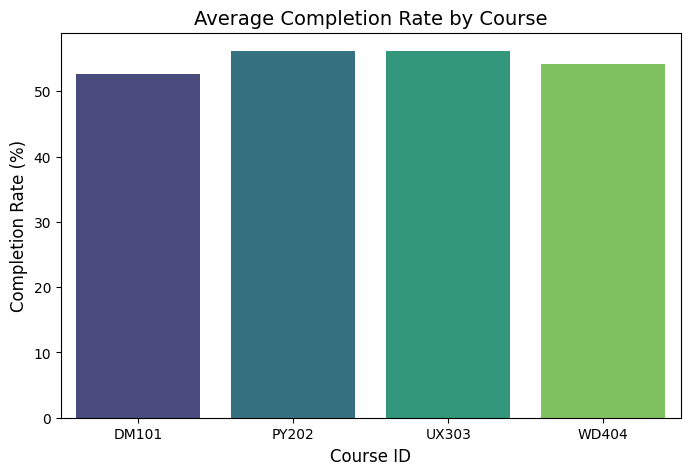

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for average completion rate per course
avg_completion_by_course = course_activity.groupby('Course_ID')['Completion_Percentage'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_completion_by_course.index, y=avg_completion_by_course.values, palette='viridis')
plt.title('Average Completion Rate by Course', fontsize=14)
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.show()


<ipython-input-8-86a7ddacc2d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_age_group.index, y=engagement_by_age_group.values, palette='coolwarm')


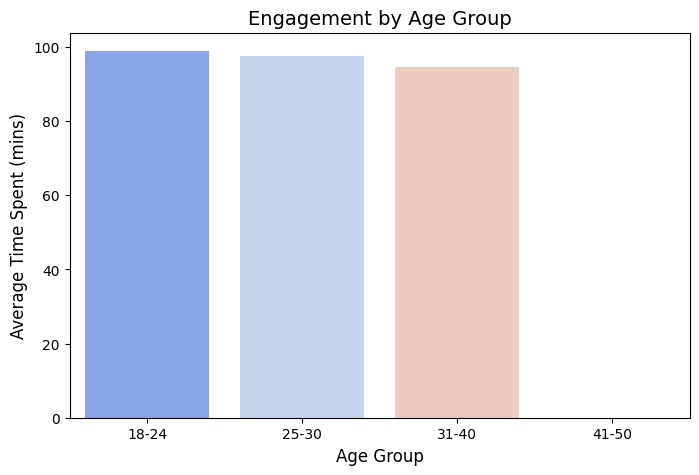

In [8]:
# Bar chart for engagement by age group
plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_by_age_group.index, y=engagement_by_age_group.values, palette='coolwarm')
plt.title('Engagement by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Time Spent (mins)', fontsize=12)
plt.show()


<ipython-input-9-63509c9b1e00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_location.index, y=engagement_by_location.values, palette='rocket')


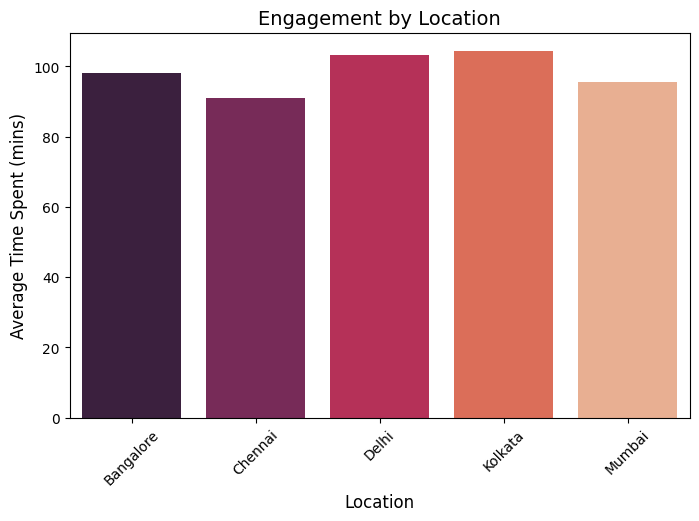

In [9]:
# Bar chart for engagement by location
plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_by_location.index, y=engagement_by_location.values, palette='rocket')
plt.title('Engagement by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Time Spent (mins)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-10-a79320e23a9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feedback_by_course.index, y=avg_feedback_by_course.values, palette='mako')


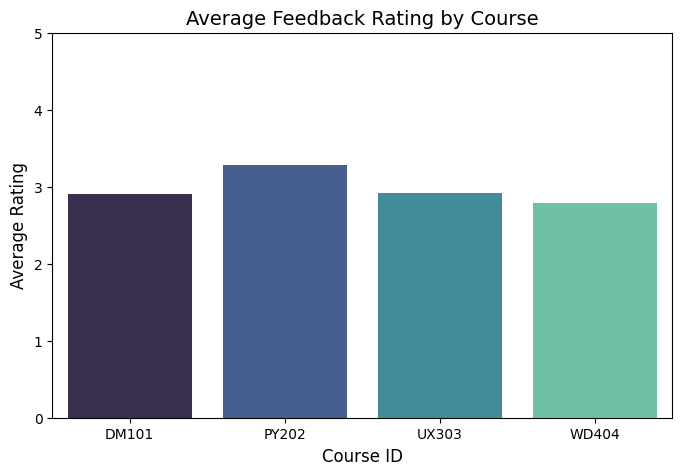

In [10]:
# Bar chart for average feedback ratings by course
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_feedback_by_course.index, y=avg_feedback_by_course.values, palette='mako')
plt.title('Average Feedback Rating by Course', fontsize=14)
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)  # Ratings are between 1 and 5
plt.show()


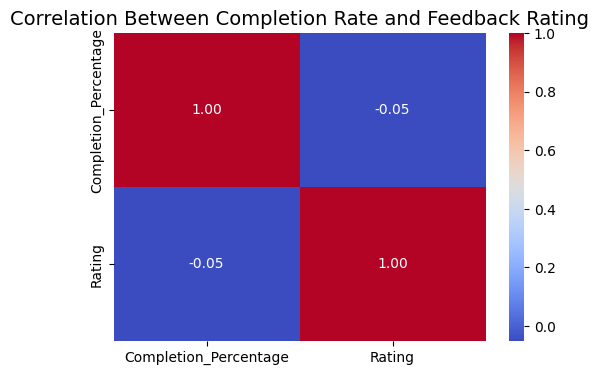

In [11]:
# Heatmap for correlation between completion rate and feedback rating
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Completion Rate and Feedback Rating', fontsize=14)
plt.show()


In [12]:
# Insights
insights = {
    "Overall Completion Rates": "The overall average completion rate is 54.78%, indicating room for improvement.",
    "Highest and Lowest Engagement": "DM101 has the highest average engagement time (102.43 mins), while PY202 has the lowest (93.90 mins).",
    "Engagement by Age Group": "Age group 18-24 shows the highest engagement (98.89 mins), highlighting a strong preference among younger audiences.",
    "Engagement by Location": "Locations like Kolkata (104.38 mins) and Delhi (103.30 mins) exhibit higher engagement, while Chennai has relatively lower engagement (90.95 mins).",
    "Feedback Ratings": "PY202 has the highest feedback rating (3.28), while WD404 has the lowest (2.79).",
    "Correlation Analysis": "There is minimal correlation (-0.05) between completion rates and feedback ratings, suggesting that completion alone doesn't strongly impact feedback."
}

# Recommendations
recommendations = {
    "Content Improvement": "Revamp PY202 to improve engagement and ratings. Consider adding interactive or gamified elements.",
    "Targeted Marketing": "Focus marketing efforts on age group 18-24 since they demonstrate higher engagement.",
    "Location-Based Initiatives": "Develop location-specific strategies, such as localized incentives or workshops, especially in low-engagement areas like Chennai."
}

# Display Insights and Recommendations
print("\nInsights:")
for key, value in insights.items():
    print(f"- {key}: {value}")

print("\nRecommendations:")
for key, value in recommendations.items():
    print(f"- {key}: {value}")



Insights:
- Overall Completion Rates: The overall average completion rate is 54.78%, indicating room for improvement.
- Highest and Lowest Engagement: DM101 has the highest average engagement time (102.43 mins), while PY202 has the lowest (93.90 mins).
- Engagement by Age Group: Age group 18-24 shows the highest engagement (98.89 mins), highlighting a strong preference among younger audiences.
- Engagement by Location: Locations like Kolkata (104.38 mins) and Delhi (103.30 mins) exhibit higher engagement, while Chennai has relatively lower engagement (90.95 mins).
- Feedback Ratings: PY202 has the highest feedback rating (3.28), while WD404 has the lowest (2.79).
- Correlation Analysis: There is minimal correlation (-0.05) between completion rates and feedback ratings, suggesting that completion alone doesn't strongly impact feedback.

Recommendations:
- Content Improvement: Revamp PY202 to improve engagement and ratings. Consider adding interactive or gamified elements.
- Targeted Ma